In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [4]:
def wet_bulb_temperature(tas, hurs):
    """
    Method: empirical formula for a pressure 101.325 kPa
    source: https://journals.ametsoc.org/view/journals/apme/50/11/jamc-d-11-0143.1.xml

    Input:
        tas in Kelvin
        hurs in %

    We checked the results visually:
    wet_bulb_temperature(30+273.15, 65) = 24.8 ~ 25
    wet_bulb_temperature(50+273.15, 10) = 24.3 ~ 25
    wet_bulb_temperature(50+273.15, 75) = 45.3 ~ 45
    wet_bulb_temperature(20+273.15, 98) = 19.8 ~ 20
    """
    T = tas - 273.15  # convert to degrees C
    return T*np.arctan(0.151977*(hurs+8.313659)**0.5) + np.arctan(T + hurs) - np.arctan(hurs - 1.676331) + 0.00391838*hurs**1.5*np.arctan(0.023101*hurs) - 4.686035

The upper limit for a human body seems to be a wet-bulb temperature of 31C. Not sure how that relates to WBGT.

Seen here
https://www.scientificamerican.com/article/how-hot-is-too-hot-for-the-human-body1/#:~:text=People%20often%20point%20to%20a,body%20to%20maintain%20a%20stable

and originally here:
https://theconversation.com/how-hot-is-too-hot-for-the-human-body-our-lab-found-heat-humidity-gets-dangerous-faster-than-many-people-realize-185593

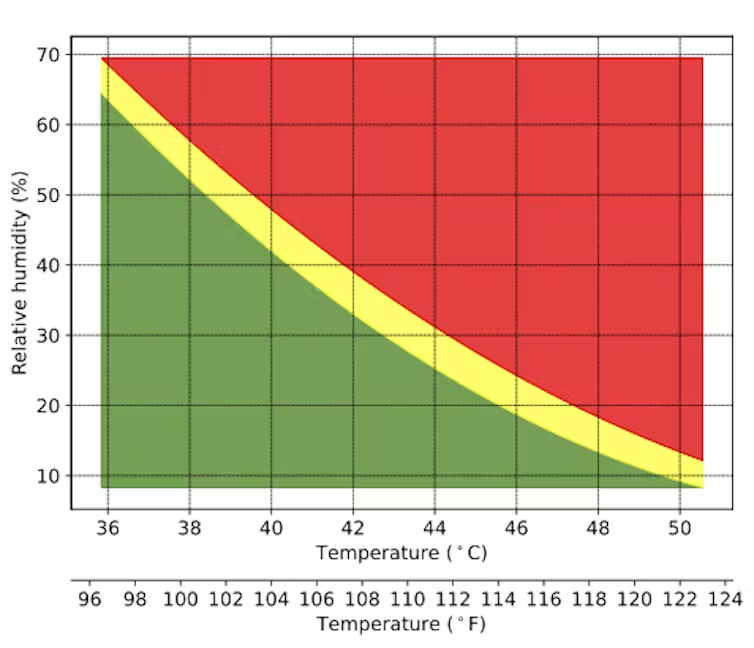

<IPython.core.display.Javascript object>


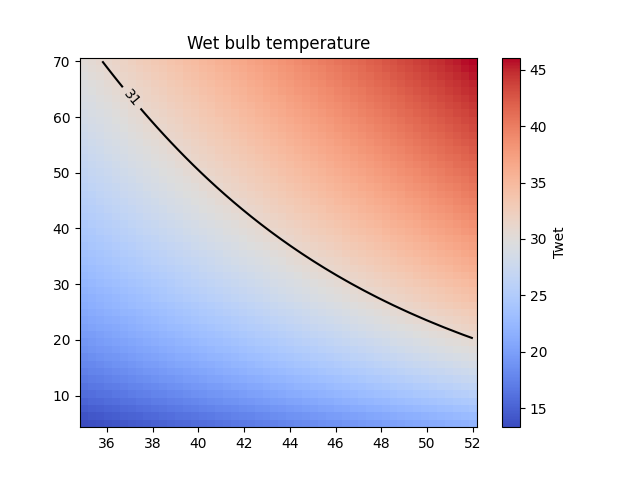

Text(0.5, 1.0, 'Wet bulb temperature')

In [25]:
tas = np.linspace(35, 52, 50)
rh = np.linspace(5, 70, 50)
tas2, rh2 = np.meshgrid(tas, rh)
twet2 = wet_bulb_temperature(tas2+273.15, rh2)
plt.figure()
plt.pcolormesh(tas, rh, twet2, cmap=plt.cm.coolwarm)
plt.colorbar(label="Twet")
c = plt.contour(tas, rh, twet2, levels=[31], colors="black")
plt.clabel(c)

plt.title("Wet bulb temperature")

<IPython.core.display.Javascript object>


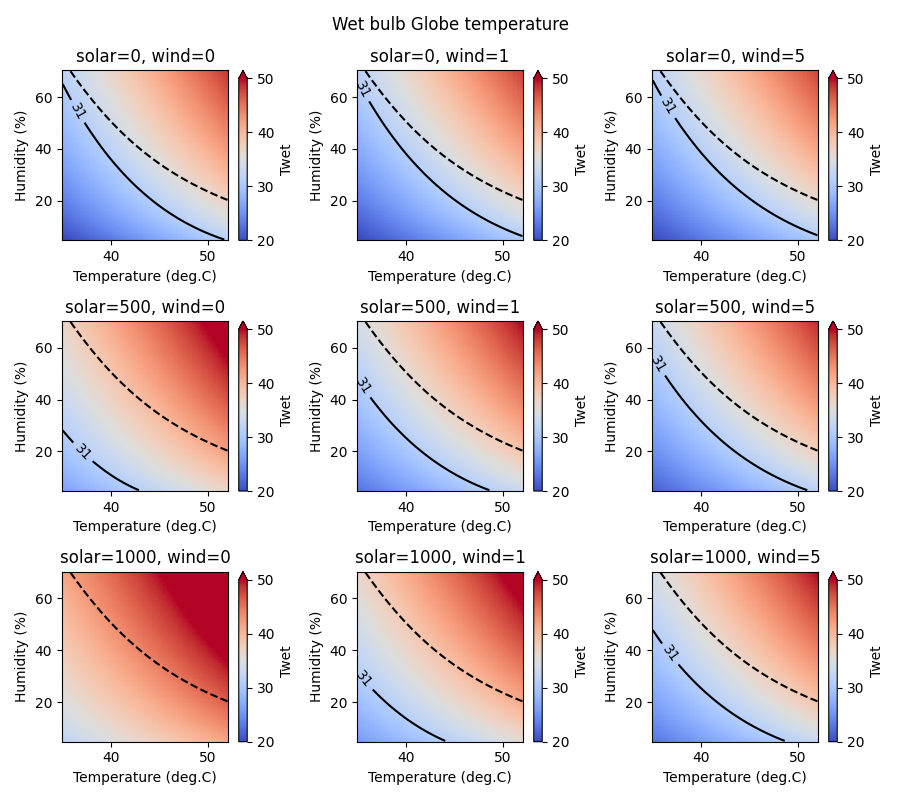

/tmp/ipykernel_7731/288156380.py:22: UserWarning: No contour levels were found within the data range.
  c = ax.contour(tas, rh, tglobe, levels=[31], colors="black")


In [56]:
tas = np.linspace(35, 52, 100)
rh = np.linspace(5, 70, 100)
tas2, rh2 = np.meshgrid(tas, rh)

fig, axes = plt.subplots(3, 3, figsize=(9,8))

twet2 = wet_bulb_temperature(tas2+273.15, rh2)


count = -1
for solar in [0, 500, 1000]:
    for wind in [0, 1, 5]:
        count += 1
        ax = axes.ravel()[count]
        # twet2 = wet_bulb_temperature(tas2+273.15, rh2)
        tglobe = np.array([[wbgt.wbgt(t+273.15, rh/100, pres=1017, speed=wind, solar=solar, fdir=1, cza=1)[-1]
                           for t in tas.ravel().tolist()] 
                          for rh in rh.ravel().tolist()])
# plt.figure()
        h = ax.pcolormesh(tas, rh, tglobe, cmap=plt.cm.coolwarm, vmin=20, vmax=50)
        plt.colorbar(h, ax=ax, label="Twet", extend="max")
        c = ax.contour(tas, rh, tglobe, levels=[31], colors="black")
        ax.clabel(c)
        
        c = ax.contour(tas, rh, twet2, levels=[31], linestyles="--", colors="black")
#         ax.clabel(c)

        ax.set_xlabel("Temperature (deg.C)")
        ax.set_ylabel("Humidity (%)")
        ax.set_title(f"solar={solar}, wind={wind}")        
        
plt.suptitle(f"Wet bulb Globe temperature")

plt.tight_layout()

<IPython.core.display.Javascript object>


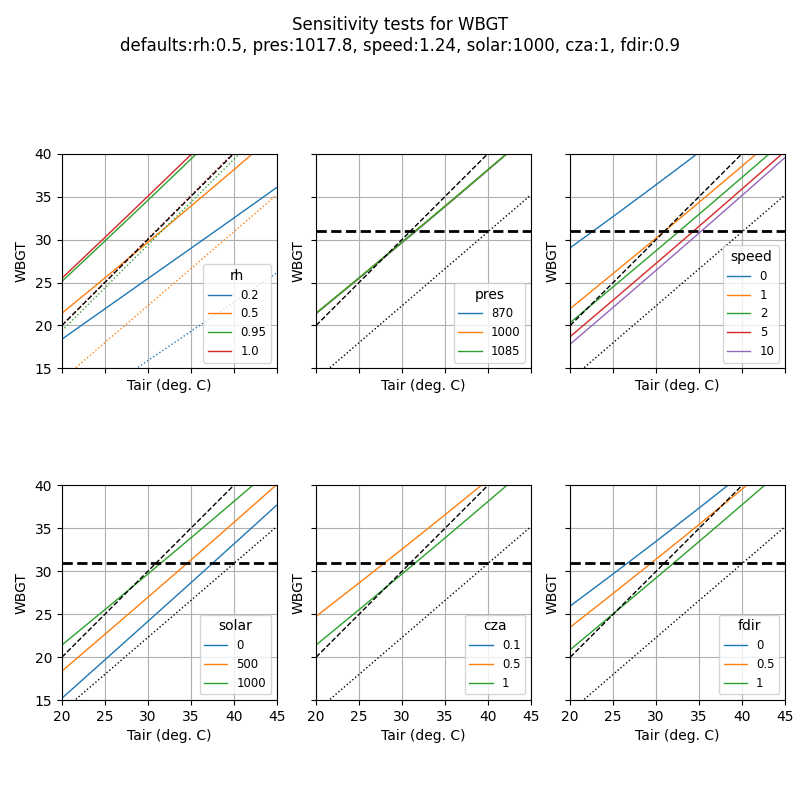

In [29]:
import numpy as np
import wbgt
f, axes = plt.subplots(2, 3, figsize=(8, 8), sharex=True, sharey=True)


params = {
    "rh": 50/100,
    "pres": 1017.8,
    "speed": 1.24,
    "solar": 1000,
    "cza": 1, 
    "fdir": 0.9,
}

sens = {
#     "tk": np.arange(20, 40, 5) + 273.15,
    "rh": np.array([20, 50, 95, 100])/100,
    "pres": [870, 1000, 1085],
    "speed": [0, 1, 2, 5, 10],
    "solar": [0, 500, 1000],
    "cza": [.1, .5, 1],
    "fdir": [0, .5, 1],
}

Tair = np.linspace(20, 40+5, 50)

for ax, v in zip(axes.ravel(), sens):
    for xi in sens[v]:
        l, = ax.plot(Tair, [wbgt.wbgt(**{**params, v:xi, "tk": T+273.15})[-1] for T in Tair.tolist()], lw=1, label=xi)
        
        if v == 'rh':
            ax.plot(Tair, wet_bulb_temperature(Tair+273.15, xi*100), lw=1, ls=":", c=l.get_color())
            
    if v != 'rh':
        ax.plot(Tair, wet_bulb_temperature(Tair+273.15, params['rh']*100), lw=1, ls=":", c='k')

            
        ax.axhline(31, color='k', ls='--', lw=2)
        
    ax.plot(Tair[[0, -1]], Tair[[0, -1]], 'k--', lw=1)
        
    ax.legend(title=v, fontsize='small')
    ax.set_aspect(1)
    ax.grid()

    ax.set_xlabel("Tair (deg. C)")
    ax.set_ylabel('WBGT')
ax.set_xlim(Tair[[0, -1]])
ax.set_ylim(15, 40)


plt.suptitle(f"Sensitivity tests for WBGT\ndefaults:"+", ".join(f"{k}:{v}" for k, v in params.items()))
plt.tight_layout()


<IPython.core.display.Javascript object>


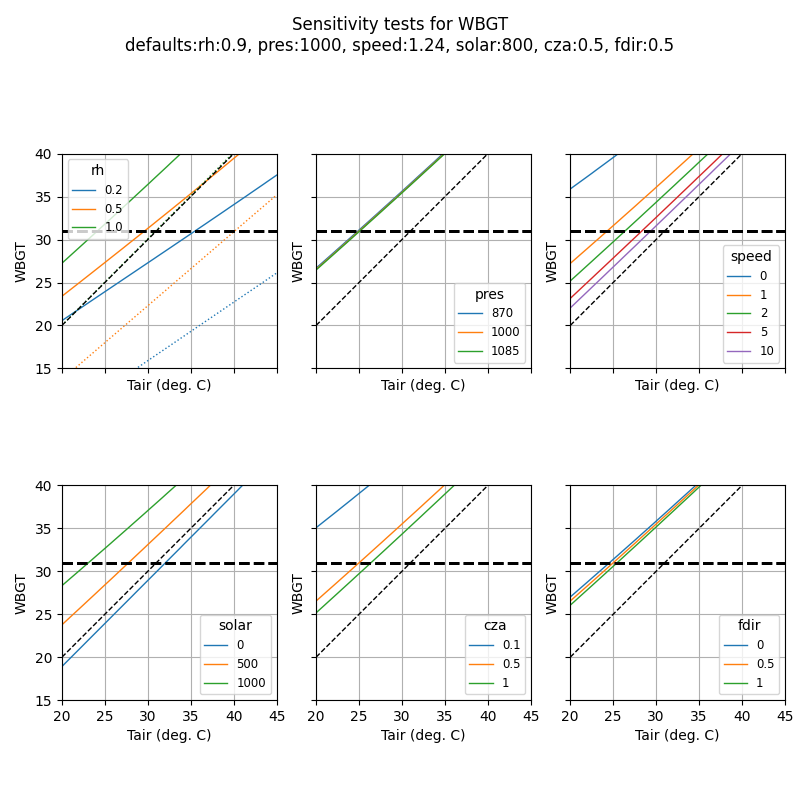

In [28]:
import numpy as np
import wbgt
f, axes = plt.subplots(2, 3, figsize=(8, 8), sharex=True, sharey=True)


params = {
    "rh": 0.90,
    "pres": 1000,
    "speed": 1.24,
    "solar": 800,
    "cza": .5, 
    "fdir": 0.5,
}

sens = {
#     "tk": np.arange(20, 40, 5) + 273.15,
    "rh": np.array([20, 50, 100])/100,
    "pres": [870, 1000, 1085],
    "speed": [0, 1, 2, 5, 10],
    "solar": [0, 500, 1000],
    "cza": [.1, .5, 1],
    "fdir": [0, .5, 1],
}

    
Tair = np.linspace(20, 40+5, 50)

for ax, v in zip(axes.ravel(), sens):
    for xi in sens[v]:
        l, = ax.plot(Tair, [wbgt.wbgt(**{**params, v:xi, "tk": T+273.15})[-1] for T in Tair.tolist()], lw=1, label=xi)
        
        if v == 'rh':
            ax.plot(Tair, wet_bulb_temperature(Tair+273.15, xi*100), lw=1, ls=":", c=l.get_color())
            
            
        ax.axhline(31, color='k', ls='--', lw=2)
        
    ax.plot(Tair[[0, -1]], Tair[[0, -1]], 'k--', lw=1)
        
    ax.legend(title=v, fontsize='small')
    ax.set_aspect(1)
    ax.grid()

    ax.set_xlabel("Tair (deg. C)")
    ax.set_ylabel('WBGT')
ax.set_xlim(Tair[[0, -1]])
ax.set_ylim(15, 40)


plt.suptitle(f"Sensitivity tests for WBGT\ndefaults:"+", ".join(f"{k}:{v}" for k, v in params.items()))
plt.tight_layout()
